#### Bibliotecas

In [365]:
# Para criar um dataframe randomico para algoritmos de agrupmaneto
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

# Para visualização de dados
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Para aplicação do KMeans
from sklearn.cluster import KMeans

# Para o Agrupamento Hierarquico
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Para o Agrupamento com base na densidade
from sklearn.cluster import DBSCAN

#### Criando base randomica com 4 clusters

In [366]:
X_random, y_random = make_blobs(n_samples=500, centers=4, random_state=0)

In [367]:
grafico = px.scatter(x=X_random[:, 0], y = X_random[:, 1])
grafico.show()

#### Aplicando KMeans

In [368]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_random)

KMeans(n_clusters=4)

In [369]:
rotulos = kmeans.predict(X_random)
rotulos

array([3, 3, 0, 0, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1, 0, 0, 3, 0, 1, 0, 0, 3,
       2, 1, 0, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 1, 0, 1, 3, 1, 3, 0, 3,
       2, 3, 0, 0, 3, 3, 1, 1, 2, 0, 0, 0, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2,
       0, 3, 0, 2, 1, 0, 1, 3, 1, 3, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1,
       3, 1, 1, 1, 3, 1, 0, 0, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 2, 3, 0, 1,
       1, 2, 1, 1, 3, 1, 3, 0, 2, 3, 2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 0, 1,
       2, 1, 1, 1, 0, 3, 0, 2, 3, 3, 3, 3, 2, 1, 0, 0, 2, 1, 0, 3, 0, 0,
       0, 2, 2, 3, 0, 0, 3, 0, 3, 3, 2, 2, 3, 0, 1, 2, 3, 1, 3, 2, 2, 1,
       0, 1, 1, 1, 3, 3, 0, 0, 2, 1, 2, 3, 2, 1, 3, 2, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 0, 3, 2, 1, 1, 1,
       0, 3, 2, 1, 2, 3, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 3, 0, 2,
       2, 3, 1, 1, 0, 3, 0, 3, 0, 2, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 3, 1,
       3, 0, 0, 0, 1, 3, 0, 1, 3, 0, 3, 1, 2, 2, 0, 3, 3, 0, 3, 2, 3, 2,
       2, 3, 0, 0, 0, 3, 1, 1, 3, 1, 1, 1, 0, 3, 3,

In [370]:
centroides = kmeans.cluster_centers_
centroides

array([[ 0.91618785,  4.35308658],
       [-1.24428679,  7.86364722],
       [-1.73282159,  2.79556356],
       [ 1.98473613,  0.77127554]])

In [371]:
grafico_1 = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos)
grafico_2 = px.scatter(x=centroides[:, 0], y=centroides[:, 1])
grafico_3 = go.Figure(data=grafico_1.data + grafico_2.data)
grafico_3.show()

### Utilizando wcss para determinar a quantidade clusters 

In [372]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_random)
    wcss.append(kmeans.inertia_)

In [373]:
grafico = px.line(x=range(1, 11), y=wcss)
grafico.show()

#### Agrupamento Hierarquico

In [374]:
hierarquico = AgglomerativeClustering(n_clusters=4)
hierarquico.fit(X_random)

AgglomerativeClustering(n_clusters=4)

In [375]:
rotulos = hierarquico.fit_predict(X_random)

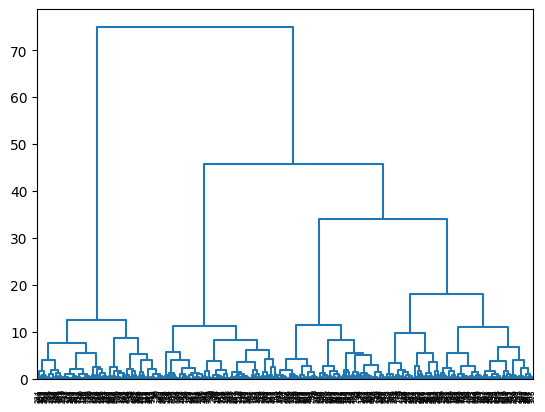

In [376]:
dendrogram = dendrogram(linkage(X_random, method='ward'), color_threshold=False)

`linkage()`: é usado para construir um dendrograma, que é uma representação gráfica de como os clusters são unidos à medida que o algoritmo de agrupamento hierárquico progride.

`dendograma()`: Um dendrograma é uma representação gráfica de como os clusters em um conjunto de dados são organizados hierarquicamente. Ele é frequentemente usado em métodos de agrupamento hierárquico para visualizar como os grupos são formados à medida que o algoritmo de agrupamento progride.

Quanto maior a barra na vértical, maior a distância entre os clustering

In [377]:
grafico_1 = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos)
grafico_1.show()

**Nota:** não desenhamos os centróides, isto se da por conta que estamos utilizando um agrupamento hierarquico e não o Kmeans.

#### DBSCAN

In [378]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_random)

DBSCAN()

In [379]:
rotulos = dbscan.fit_predict(X_random)

In [380]:
grafico_1 = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos)
grafico_1.show()

#### Comparação entres os métodos de agrupamento mostrado

In [381]:
X_random, y_random = make_moons(n_samples=2000, noise=0.1, random_state=0)

In [382]:
grafico_moon = px.scatter(x=X_random[:, 0], y=X_random[:, 1])
grafico_moon.show()

##### KMeans

In [383]:
kmeans = KMeans(n_clusters=2).fit(X_random)
rotulos_kmeans = kmeans.labels_

In [384]:
grafico_kmeans = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos_kmeans)
grafico_kmeans.show()

##### Hierarquico

In [385]:
hierarquico = AgglomerativeClustering(n_clusters=2).fit(X_random)
rotulos_hierarquico = hierarquico.labels_

In [386]:
grafico_hierarquico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color = rotulos_hierarquico)
grafico_hierarquico.show()

##### DBSCAN

In [387]:
dbscan = DBSCAN(eps=0.1, min_samples=2).fit(X_random)
rotulos_dbscan = dbscan.labels_

In [388]:
grafico_dbscan = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color= rotulos_dbscan)
grafico_dbscan.show()